# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | quepos
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | kegeyli shahar
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | kirtipur
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | ola
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | malanje
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,273.83,92,0,1.75,NZ,1720798387
1,quepos,9.4236,-84.1652,301.20,77,93,1.52,CR,1720798388
2,edinburgh of the seven seas,-37.0676,-12.3116,282.85,59,14,6.08,SH,1720798390
3,luderitz,-26.6481,15.1594,288.32,64,1,3.42,NA,1720798391
4,adamstown,-25.0660,-130.1015,293.09,88,100,8.41,PN,1720798392


In [21]:
city_data_df.to_csv(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,273.83,92,0,1.75,NZ,1720798387
1,quepos,9.4236,-84.1652,301.20,77,93,1.52,CR,1720798388
2,edinburgh of the seven seas,-37.0676,-12.3116,282.85,59,14,6.08,SH,1720798390
3,luderitz,-26.6481,15.1594,288.32,64,1,3.42,NaN,1720798391
4,adamstown,-25.0660,-130.1015,293.09,88,100,8.41,PN,1720798392


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

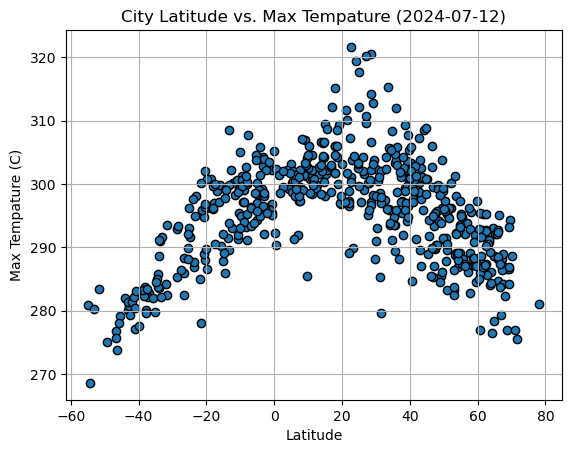

In [35]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Max Temp'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Max Tempature (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Tempature (C)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

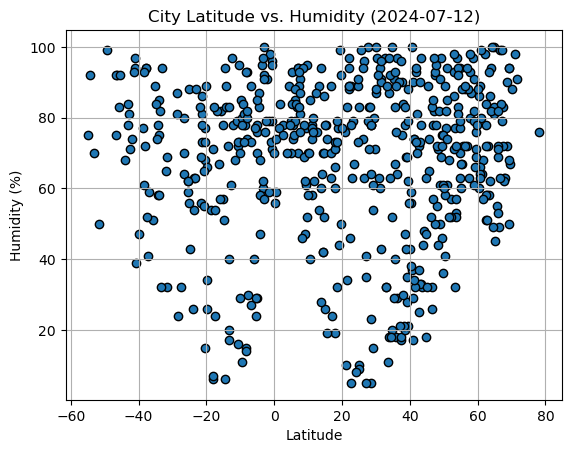

In [36]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Humidity'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Humidity (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

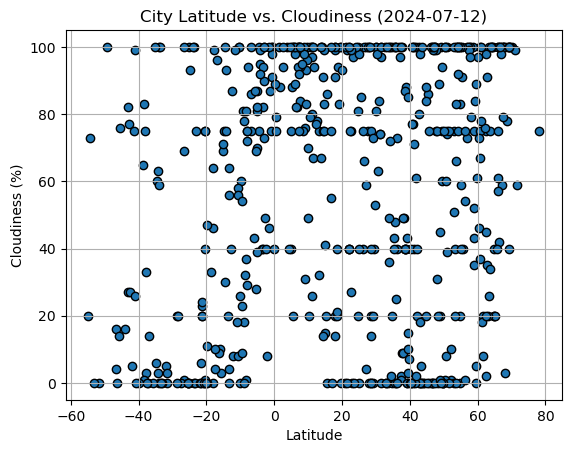

In [37]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Cloudiness'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Cloudiness (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

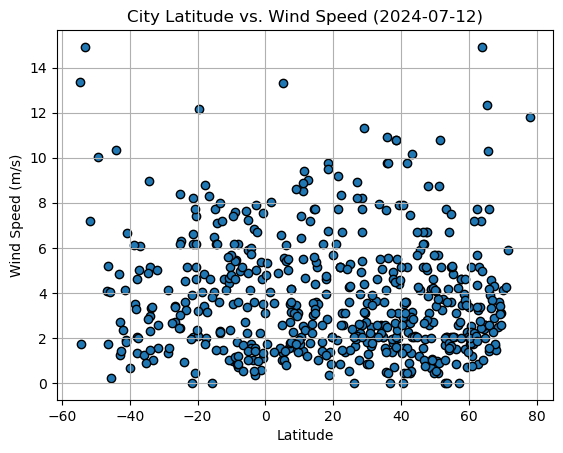

In [38]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Wind Speed'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Wind Speed (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linear_regression_plots(df, x, y):
    slope, intercept, rvalue, pvalue, std_err = linregress(df[x], df[y])
    r_squared = rvalue ** 2
    df_liniregress = df.copy()
    df_liniregress["liniregress_y"] = [((x_liniregress*slope) + intercept) for x_liniregress in df[x] ]

    fig, ax = plt.subplots()
    ax.scatter(
        x = df_liniregress[x],
        y = df_liniregress[y],
        color = 'b',
        label = "Data Point"
    )
    ax.plot(df_liniregress[x],
            df_liniregress[f'liniregress_y'],
            color = 'r',
            label = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    )
    ax.set_title(x + " vs " + y)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()
    return print(f"The r^2 values is {r_squared}")

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,quepos,9.4236,-84.1652,301.20,77,93,1.52,CR,1720798388
5,bethel,41.3712,-73.4140,300.73,74,40,3.60,US,1720798393
6,yellowknife,62.4560,-114.3525,287.44,51,75,7.72,CA,1720798394
7,qaqortoq,60.7167,-46.0333,277.03,89,100,2.52,GL,1720798395
9,vadso,70.0744,29.7487,288.64,88,100,4.12,NO,1720798397


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,273.83,92,0,1.75,NZ,1720798387
2,edinburgh of the seven seas,-37.0676,-12.3116,282.85,59,14,6.08,SH,1720798390
3,luderitz,-26.6481,15.1594,288.32,64,1,3.42,NaN,1720798391
4,adamstown,-25.0660,-130.1015,293.09,88,100,8.41,PN,1720798392
8,grytviken,-54.2811,-36.5092,268.62,92,73,1.72,GS,1720798396


###  Temperature vs. Latitude Linear Regression Plot

The r^2 values is 0.3909202283155271


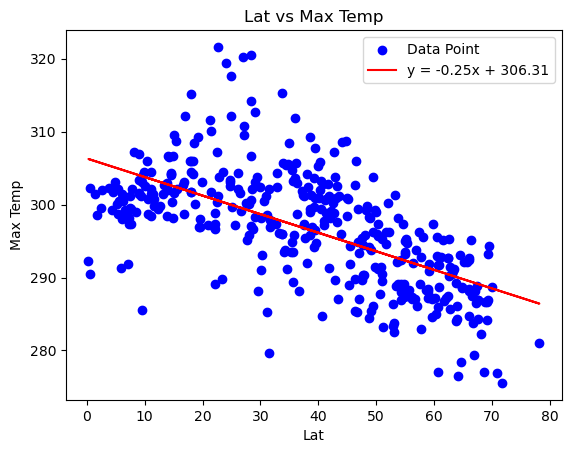

In [76]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Max Temp")
plt.show()

The r^2 values is 0.7023064175160177


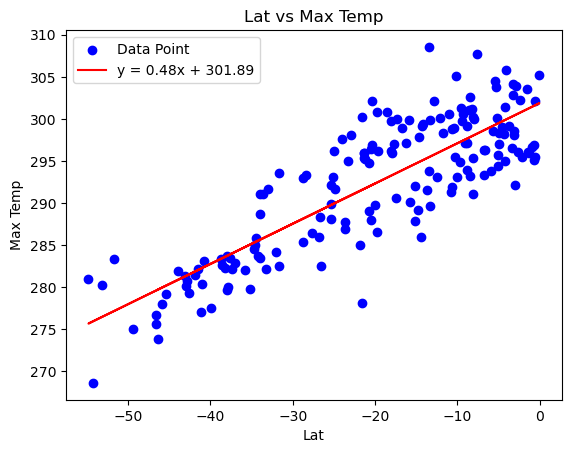

In [77]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 values is 0.003272358828081816


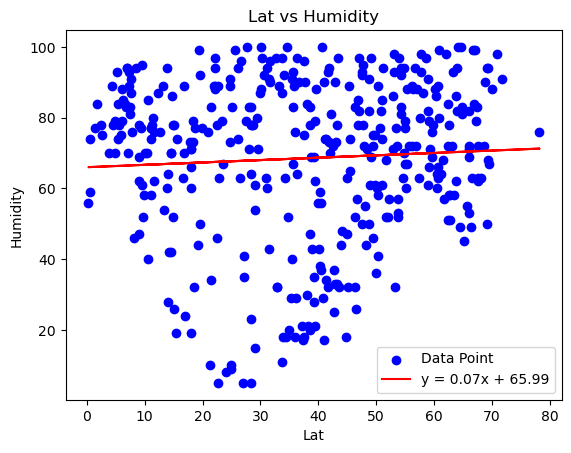

In [78]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Humidity")
plt.show()

The r^2 values is 0.006337490155586562


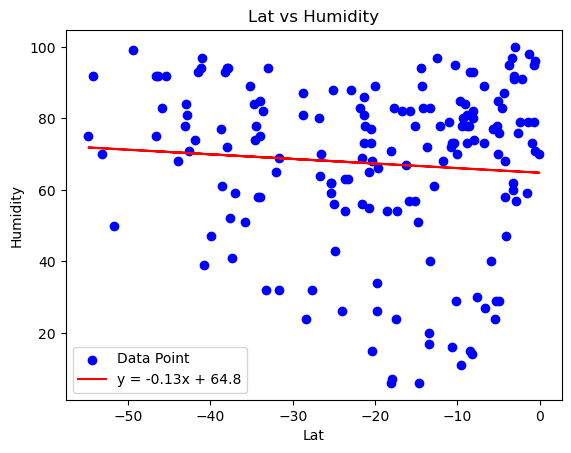

In [79]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 values is 0.01021001939779179


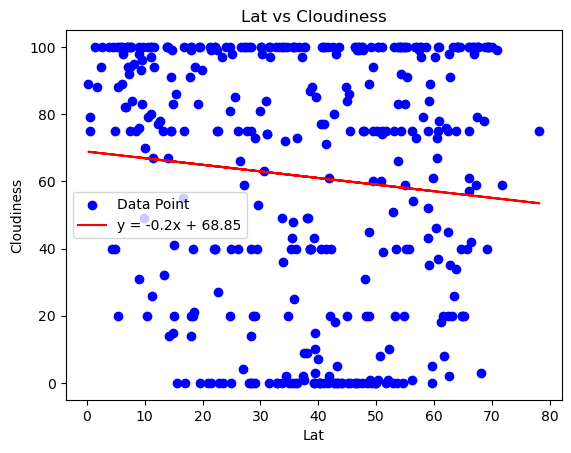

In [80]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Cloudiness")
plt.show()

The r^2 values is 0.116576197030762


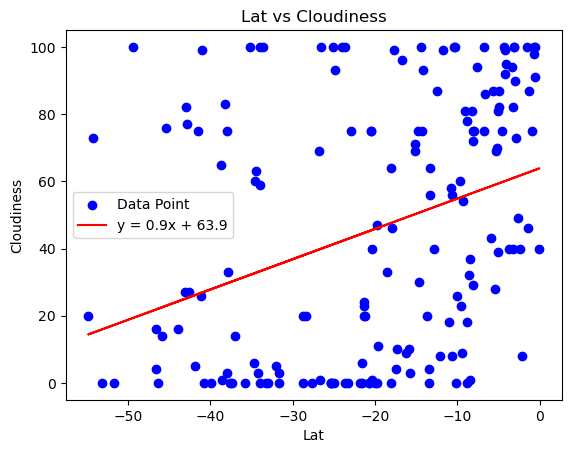

In [81]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 values is 0.0023394395926304816


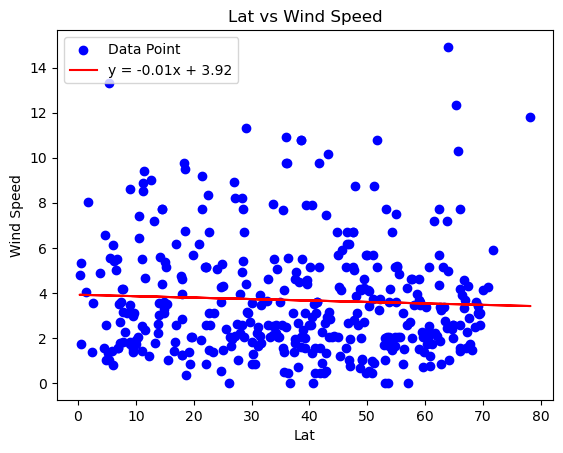

In [83]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Wind Speed")
plt.show()

The r^2 values is 0.01241096908683099


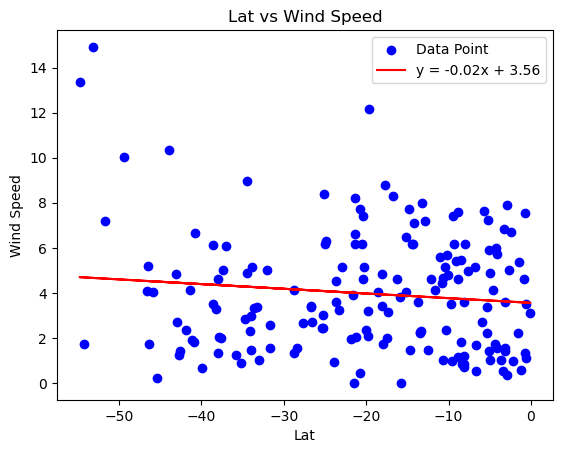

In [82]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE